In [52]:
import matplotlib.pyplot as plt

def display(images, count=5, is_gray=False):
    plt.figure(figsize=(20, 20))
    for i, image in enumerate(images):
        if is_gray:
            plt.subplot(1, count, i+1), plt.imshow(image, cmap='gray'), plt.axis('off')
        else:
            plt.subplot(1, count, i+1), plt.imshow(image), plt.axis('off')
    plt.tight_layout()

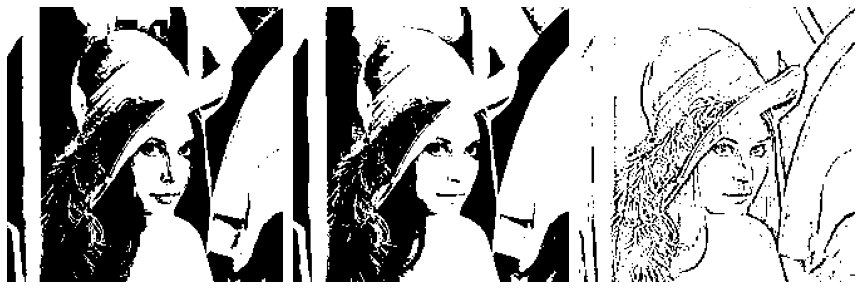

In [56]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

path_images = '/mnt/c/data/IP_images'
file_name = 'lena.jpg'
path = str(Path(path_images, file_name))

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

img_bin_th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img_otsu_th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_adp_th = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 10)

images = [img_bin_th[1], img_otsu_th[1], img_adp_th]
display(images, is_gray=True)


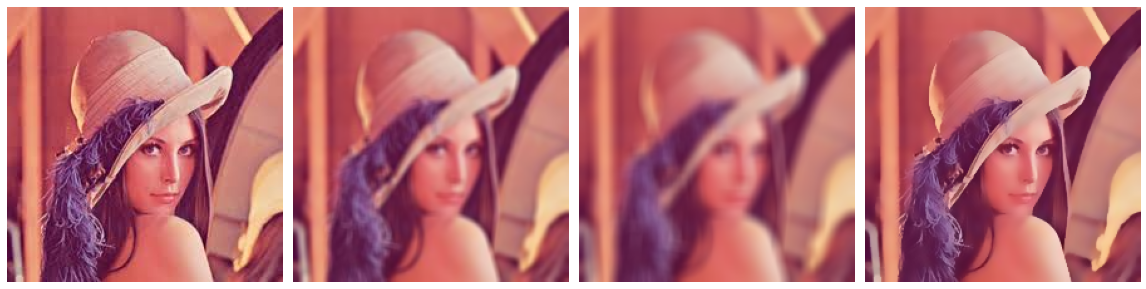

In [61]:
import numpy as np

img = cv2.imread(path)

kernel = np.ones((5, 5), np.float32)/25
kernel_2 = np.ones((10, 10), np.float32)/100

blured = cv2.filter2D(img, -1, kernel)
blured_2 = cv2.filter2D(img, -1, kernel_2)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blured = cv2.cvtColor(blured, cv2.COLOR_BGR2RGB)
blured_2 = cv2.cvtColor(blured_2, cv2.COLOR_BGR2RGB)
bilateral = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

images = [img, blured, blured_2, bilateral]
display(images)


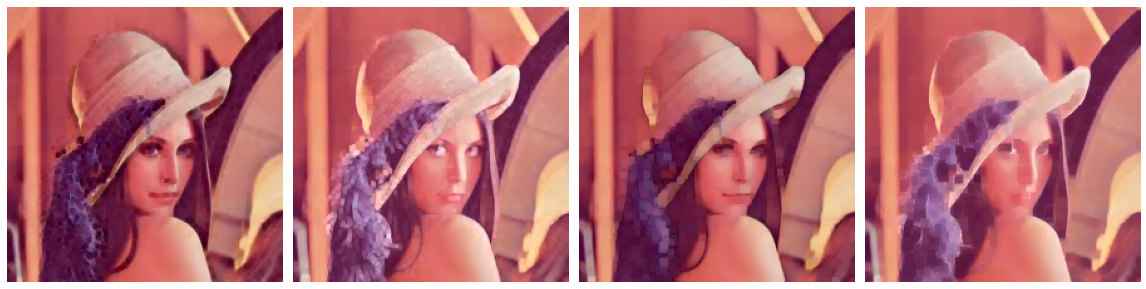

In [62]:
kernel = np.ones((3,3), np.uint8)

eroded = cv2.erode(img, kernel, iterations=1)
dilated = cv2.dilate(img, kernel, iterations=1)

kernel = np.ones((5,5), np.uint8)

opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

images = [eroded, dilated, opened, closed]
display(images)


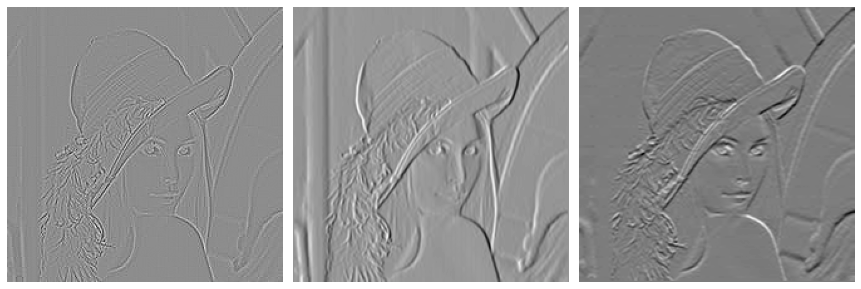

In [65]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

images = [laplacian, sobel_x, sobel_y]
display(images, is_gray=True)
